## Logistic Regression

Logistic regression is a generalization of linear regression. While the dependent variable $y$ of linear regression is a continuous value, the dependent variable of logistic regression is a binary value of 0/1. And that requires us to set up some kind of projection that converts the original real value to 0/1. Here is where the sigmoid function comes in.

In [50]:
import numpy as np

In [ ]:
def initialize_params(dims): 
    w = np.zeros((dims, 1)) 
    b=0
    return w, b

sigmoid function: $f(x)=\frac{1}{1 + e^{-x}}$

Another good feature of the sigmoid function is that its derivation calculation: $f^{\prime}(x) = f(x)(1-f(x)),$ which provides great convenience for us to find the gradient of the cross entropy loss in the following calculation.

In [51]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x)) 
    return z

From sigmoid function, we can find out the basic model of logistic regression: $\enspace y = \frac{1}{1 + e^{-W^{T}x+b}}$

Adjust the formula above: $\enspace \text{ln} \frac{y}{1-y} = W^{T}x+b$

View $y$ as the posterior probability $p(y=1 | x)$: $\enspace \text{ln} \frac{p(y=1 | x)}{p(y=0 | x)} = W^{T}x+b$

Then we get $\enspace p(y=1 | x) = \frac{W^{T}x+b}{1+W^{T}x+b} = \hat{y}, \quad p(y=0 | x) = \frac{1}{1+W^{T}x+b} = 1-\hat{y}$

Summarize the two formulas above: $\enspace p(y|x) = {\hat{y}}^{y} (1-\hat{y})^{1-y}$

Cross-entropy loss function is the logarithmic form of the formula above: \
$\text{ln}p(y|x) = y\text{log}\hat{y} + (1-y)\text{log} (1-\hat{y}) = y\text{log}\frac{1}{1 + e^{-W^{T}x+b}} + (1-y)\text{log} (1-\frac{1}{1 + e^{-W^{T}x+b}})$

Optimize the formula above, we get MLE, and based on it, the partial derivatives of W and b are obtained: \
$\frac{\partial L}{\partial W} = \frac{1}{m}x(\hat{y}-y), \quad \frac{\partial L}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}-y)$

Through updating the weighted value of gradient of $W$ and $b$, we can find the best parameters to minimize the loss.


In [53]:
def logistic(X, y, w, b): 
    num_train = X.shape[0] 
    num_feature = X.shape[1]
    a = sigmoid(np.dot(X, w) + b)
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    cost = np.squeeze(cost)
    dw = np.dot(X.T, (a-y))/num_train 
    db = np.sum(a-y)/num_train
    return a, cost, dw, db

In [54]:
# Update parameters based on gradient descent
def logistic_train(X, y, learning_rate, epochs):
    w, b = initialize_params(X.shape[1]) 
    cost_list = []
    for i in range(epochs):
        a, cost, dw, db = logistic(X, y, w, b) 
        w = w -learning_rate * dw
        b = b -learning_rate * db

        if i % 100 == 0:
            cost_list.append(cost)
            print('epoch %d cost %f' % (i, cost))

    # save parameters
    params = {'w':w, 'b':b}
    # save gradient
    grads = {'dw':dw, 'db':db}

    return cost_list, params, grads

In [55]:
# Define the prediction function for test data
def predict(X, params):
    y_prediction = sigmoid(np.dot(X, params['w']) + params['b']) 
    for i in range(len(y_prediction)):
        if y_prediction[i] > 0.5: 
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
            
    return y_prediction

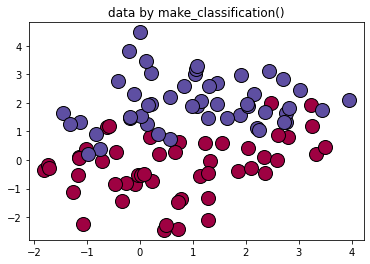

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification 
X,labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2)
rng = np.random.RandomState(2)
X += 2*rng.uniform(size=X.shape)
unique_lables = set(labels) 
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_lables))) 

for k, col in zip(unique_lables, colors):
    x_k = X[labels==k]
    plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k", markersize=14) 

plt.title('data by make_classification()')
plt.show()

In [57]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset] 
X_test, y_test = X[offset:], labels[offset:] 
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape) 
print('X_test=', X_test.shape) 
print('y_train=', y_train.shape) 
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [67]:
# train the model on training set
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)

epoch 0 cost 0.693147
epoch 100 cost 0.529118
epoch 200 cost 0.460841
epoch 300 cost 0.420107
epoch 400 cost 0.392051
epoch 500 cost 0.371216
epoch 600 cost 0.354972
epoch 700 cost 0.341864
epoch 800 cost 0.331012
epoch 900 cost 0.321849


In [68]:
# predict result on test set
y_train_pred = predict(X_train, params)
y_prediction = predict(X_test, params) 

In [69]:
# evaluate the accuracy of training and test
def accuracy(y_test, y_pred): 
    correct_count = 0
    for i in range(len(y_test)):
        for j in range(len(y_pred)):
            if y_test[i] == y_pred[j] and i == j:
                correct_count +=1
    accuracy_score = correct_count / len(y_test)
    return accuracy_score

In [70]:
accuracy_score_train = accuracy(y_train, y_train_pred) 
print(accuracy_score_train)

accuracy_score_test = accuracy(y_test, y_prediction) 
print(accuracy_score_test)

0.9222222222222223
0.9


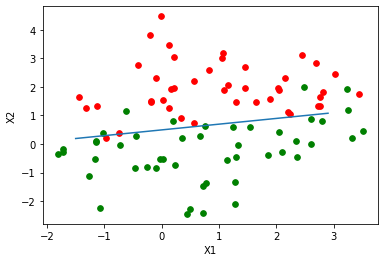

In [62]:
# plot the model decision boundary
def plot_logistic(X_train, y_train, params): 
    n = X_train.shape[0]
    xcord1, ycord1, xcord2, ycord2 = [], [], [], []
    for i in range(n):
        if y_train[i] == 1: 
            xcord1.append(X_train[i][0]) 
            ycord1.append(X_train[i][1])
        else: 
            xcord2.append(X_train[i][0]) 
            ycord2.append(X_train[i][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=32, c='red') 
    ax.scatter(xcord2, ycord2, s=32, c='green')
    x = np.arange(-1.5, 3, 0.1)
    y = (-params['b'] - params['w'][0]*x) / params['w'][1] 
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_logistic(X_train, y_train, params)